In [23]:
import pandas as pd

In [24]:
data=pd.read_csv("height-weight.csv")

In [25]:
data.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

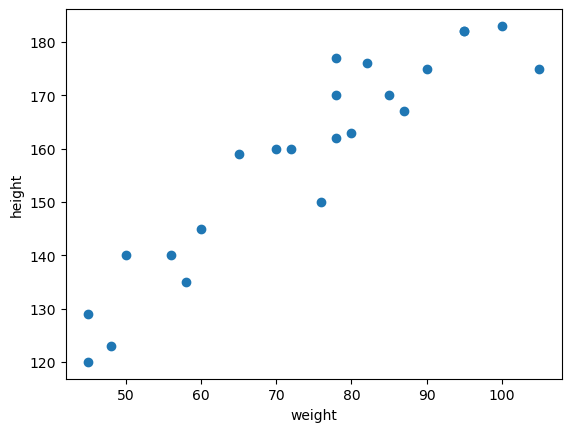

In [30]:
import matplotlib.pyplot as plt
plt.scatter(data["Weight"] , data["Height"])
plt.xlabel("weight")
plt.ylabel("height")

In [31]:
data.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


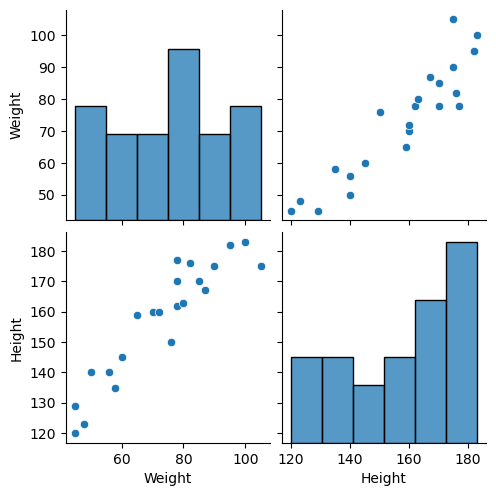

In [32]:
import seaborn as sns
sns.pairplot(data)

In [7]:
data.isnull().sum()

Weight    0
Height    0
dtype: int64

In [39]:
x=data[["Weight"]]       ##independent feature of simple linear regression should be in [[]] i.e it gives a data frame
y=data["Height"]    ## can be in series or 1d array

In [40]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.3 , random_state=42)

In [41]:
x_train.shape , x_test.shape

((16, 1), (7, 1))

In [46]:
from sklearn.preprocessing import StandardScaler
scaled=StandardScaler()
x_train_scaled=scaled.fit_transform(x_train)
x_test_scaled=scaled.fit(x_test)

In [47]:
x_train_scaled , x_test_scaled

(array([[ 1.60377199],
        [ 0.2785895 ],
        [-1.52847753],
        [ 1.30259415],
        [-1.70918423],
        [-0.80565072],
        [-0.20329504],
        [ 0.15811836],
        [-1.40800639],
        [-1.04659299],
        [-0.08282391],
        [ 1.00141631],
        [ 0.51953177],
        [ 0.70023847],
        [ 0.82070961],
        [ 0.39906064]]),
 StandardScaler())

In [15]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [49]:
model.fit(x_train_scaled , y_train)

LinearRegression()

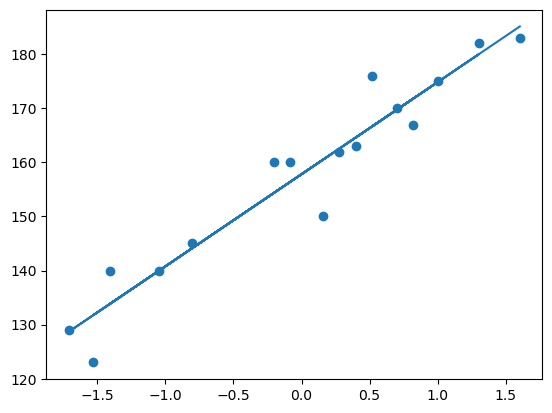

In [56]:
### best fit line

plt.scatter(x_train_scaled , y_train)
plt.plot(x_train_scaled , model.predict(x_train_scaled))

In [60]:
model.coef_

array([17.03207732])

In [61]:
model.intercept_

np.float64(157.8125)

In [63]:
prediction=model.predict(x_test)
prediction

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([1486.31453114, 1486.31453114,  924.2559795 , 1775.85984562,
       1264.89752595, 1946.18061884, 1145.67298469])

In [72]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
mae=mean_absolute_error(y_test , prediction)
mse=mean_squared_error(y_test , prediction)
score=r2_score(y_test , prediction)
print(mae)
print(mse)
print(score)

1273.0708595528192
1716536.482684556
-3614.469723673626


In [80]:
new_data_prediction=model.predict(scaled.transform([[72]]))
new_data_prediction

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.29081997])